# XGBoost simple example with AWS deploy

## source: https://github.com/aws-samples/aws-ai-ml-workshop-kr/blob/master/sagemaker/xgboost/warmingup1.xgboost_simple.ipynb

AWS를 이용한 MLOps 간단한 체험

- 기존 노트북을 이용한 모델 학습과 AWS를 이용하여 모델을 업로드한 후 학습하는 코드 작성 및 비교
- 코드 자체적으로 해석 및 설명

# Xgboost with Jupyter Notebook

In [1]:
!pip install xgboost

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [6]:
pd.set_option('Display.max_columns', 100) #dataframe의 보여주는 최대 열 갯수 수정
pd.set_option('Display.max_rows', 100) #dataframe의 보여주는 최대 행 갯수 수정

In [7]:
breast = load_breast_cancer() #breast_cancer data 가져오기
df = pd.DataFrame(breast.data) #data를 dataframe으로 변경
target = pd.DataFrame(breast.target, columns = ['target']) #target data를 dataframe으로 변경
df.columns = breast.feature_names #dataframe으로 변경한 data의 열 이름 변경
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
print(breast.DESCR)#데이터의 설명서(명세서)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
df.shape

(569, 30)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, shuffle = True, random_state = 2042)#데이터를 train data와 test data로 분리

In [10]:
import xgboost as xgb

xgb = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, reg_alpha = 10, reg_lambda  = 10, n_estimators = 10)#XGBClassifier 분류기 및 하이퍼 파라미터 정의

In [9]:
model = xgb.fit(X_train, y_train) #모델 학습

In [10]:
model.get_booster().get_score(importance_type='weight') #변수들의 가중치 확인

{'mean radius': 3.0,
 'mean texture': 4.0,
 'mean perimeter': 1.0,
 'mean area': 1.0,
 'mean concavity': 1.0,
 'mean concave points': 2.0,
 'mean fractal dimension': 1.0,
 'radius error': 2.0,
 'texture error': 1.0,
 'area error': 1.0,
 'concave points error': 1.0,
 'symmetry error': 1.0,
 'worst radius': 2.0,
 'worst texture': 3.0,
 'worst perimeter': 2.0,
 'worst area': 2.0,
 'worst smoothness': 3.0,
 'worst compactness': 1.0,
 'worst concavity': 6.0,
 'worst concave points': 5.0,
 'worst symmetry': 1.0}

In [11]:
y_pred = xgb.predict(X_test) #test data 예측

In [12]:
from sklearn.metrics import f1_score, classification_report
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9699570815450643
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.97      0.97       117

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



# Xgboost with AWS Sagemaker

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [14]:
pd.set_option('Display.max_columns', 100)
pd.set_option('Display.max_rows', 100)

In [15]:
breast = load_breast_cancer()
df = pd.DataFrame(breast.data)
target = pd.DataFrame(breast.target, columns = ['target'])
df.columns = breast.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
import sagemaker #sagemaker를 이용하기 위한 패키지 import

sess = sagemaker.Session() #S3 또는 기타 기능을 사용하기 위한 Session정의(사용자 지역?정의)
bucket = sagemaker.Session().default_bucket() #사용할 S3의 기본 버킷 정의
prefix = 'sagemaker/DEMO-breast-sm'#버킷 내부의 기본 디렉토리 정의
# Define IAM role
import boto3 #AWS 인프라 서비스를 위한 패키지 import ##출처: https://docs.aws.amazon.com/pythonsdk/
from sagemaker import get_execution_role #api를 사용하기위한 자격증명 역활 ARN을 반환하기위한 패키지 import

role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [17]:
train_df, valid_df, test_df = np.split(pd.concat([target, df],axis=1), [int(len(df)*0.7), int(len(df)*0.9)]) #데이터 분할
train_df.to_csv('breast_train.csv', index=False, header=False)
valid_df.to_csv('breast_valid.csv', index=False, header=False)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
import os 
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('breast_train.csv') #boto3로 aws서비스 호출 후 s3 버킷에 train data 업로드
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('breast_valid.csv') #boto3로 aws서비스 호출 후 s3 버킷에 valid data 업로드

In [19]:
from sagemaker.amazon.amazon_estimator import image_uris #AWS의 내장 ML 알고리즘을 사용하기 위한 이미지 컨테이너를 가져오기 위하여 패키지 import
container = image_uris.retrieve('xgboost', region=sess.boto_region_name, version='latest') #AWS 내장 ML 알고리즘 이미지 컨테이너 정의

s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv') #train data 경로 정의
s3_input_valid = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv') #valid data 경로 정의

In [46]:
%%time

xgb = sagemaker.estimator.Estimator(container, #추정기 정의
                                    role, 
                                    instance_count=1, #몇개의 instance를 쓸것인지 
                                    instance_type='ml.m4.xlarge', #기존 Jupyter notebook에서 학습가능하나, 또다른 instance에서 학습하기 위하여 instance type 정의
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),#결과물 출력 경로 지정
                                    sagemaker_session=sess)#Session(지역)지정?
xgb.set_hyperparameters(objective ='binary:logistic', 
                        colsample_bytree = 0.3, 
                        learning_rate = 0.1,
                        max_depth = 5, 
                        reg_alpha = 10,
                        reg_lambda = 10,
                        n_estimators = 10,
                        num_round=100)

xgb.fit({'train': s3_input_train, 'validation': s3_input_valid})#위에서 지정해준 train data, valid data로 학습 시작  
#기존 Jupyter notebook이 아닌 추정기에서 정의한  또다른 instance인 'ml.m4.xlarge' 에서 학습
#학습에서만 사용되고 학습 종료후 instance도 같이 종료됨(Jupyter notebook의 instance는 계속 유지)

2024/08/18 15:25:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/08/18 15:25:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
INFO:sagemaker:Creating training-job with name: xgboost-2024-08-18-15-25-27-262


2024-08-18 15:25:27 Starting - Starting the training job......
2024-08-18 15:26:17 Downloading - Downloading input data...
2024-08-18 15:26:43 Downloading - Downloading the training image......
2024-08-18 15:27:43 Training - Training image download completed. Training in progress..Arguments: train
[2024-08-18:15:27:54:INFO] Running standalone xgboost training.
[2024-08-18:15:27:54:INFO] File size need to be processed in the node: 0.1mb. Available memory size in the node: 8450.84mb
[2024-08-18:15:27:54:INFO] Determined delimiter of CSV input is ','
[15:27:54] S3DistributionType set as FullyReplicated
[15:27:54] 398x30 matrix with 11940 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2024-08-18:15:27:54:INFO] Determined delimiter of CSV input is ','
[15:27:54] S3DistributionType set as FullyReplicated
[15:27:54] 114x30 matrix with 3420 entries loaded from /opt/ml/input/data/validation?format=csv&label_column=0&delimiter=,
[15:27:54] src/tree/updater_pr

In [21]:
xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: xgboost-2024-08-18-13-32-05-810
INFO:sagemaker:Creating endpoint-config with name xgboost-2024-08-18-13-32-05-810
INFO:sagemaker:Creating endpoint with name xgboost-2024-08-18-13-32-05-810


------!

In [22]:
from sagemaker.serializers import CSVSerializer #test data를 csv 파일로 변환하기위한 패키지 import
xgb_predictor.serializer = CSVSerializer()

feat = np.array(test_df.iloc[:1,1:])#test data중 하나만 가져오기
xgb_predictor.predict(feat)

b'0.00043950427789241076'

In [23]:
def predict(feat_array):#test data 여러개 예측하는 함수 작성
    predictions = []
    for array in feat_array: #1row == 1result 이므로 feat_array의 row 만큼 for문 반복하여 row단위로 결과값 예측후 predictions에 result값 append
        predictions.append(float(xgb_predictor.predict(array).decode('utf-8')))
    return predictions

In [24]:
feats = np.array(test_df.iloc[:,1:])
results = np.round(predict(feats), 0)

In [25]:
results

array([0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1.])

In [26]:
from sklearn.metrics import f1_score, classification_report
print(f1_score(test_df['target'], results))
print(classification_report(test_df['target'], results))

0.9882352941176471
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.98      0.99        43

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



INFO:matplotlib.font_manager:generated new fontManager


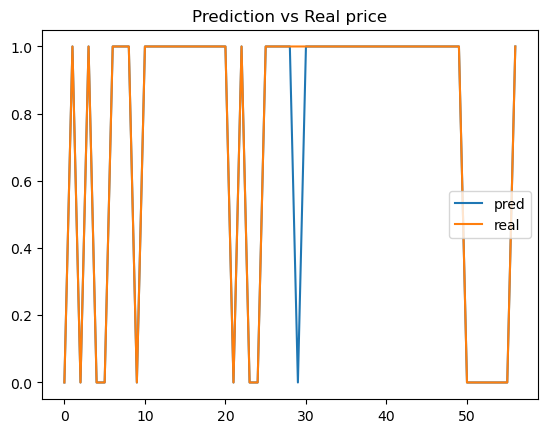

In [27]:
import matplotlib.pyplot as plt #기존 test data와 predicted result 값을 비교해보기
plt.plot(results)
plt.plot(np.array(test_df['target']))
plt.legend(['pred','real'])
plt.title('Prediction vs Real price')
plt.show() #파란줄(pred)값이 안보이는 이유는 값이 겺치는 경우가 많기 때문